In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg', }

In [2]:
import numpy as np    # For numerics
import matplotlib.pyplot as plt  # For plotting
import scipy.integrate as spi  #For integration

![Rxn](../images/BierEtAl.png)

In [3]:
Vin = 0.36
k1 = 0.02
kp = 6.0
Km1 = 20 # <-- This is the true value
Km2 = 13 
Km = Km2

initial_concentrations = [1.0, 1.0]

In [4]:
def roc_glucose_with_pulse(concentrations, t):
    G, A = concentrations
    if t < 800 or t > 1100:
        return Vin - k1*G*A
    else:
        return Vin*2 - k1*G*A
    
def roc_glucose(concentrations, t):
    G, A = concentrations
    return Vin - k1*G*A

def roc_atp(concentrations, t):
    G, A = concentrations
    return 2*k1*G*A - ((kp*A)/(A+Km))

def roc_system(concentrations, t):
    return [roc_glucose(concentrations, t),
            roc_atp(concentrations, t)]

In [5]:
roc_system(initial_concentrations, 0)

[0.33999999999999997, -0.38857142857142857]

In [6]:
t = np.linspace(0,1000,1500)

In [7]:
result = spi.odeint(roc_system, initial_concentrations, t)

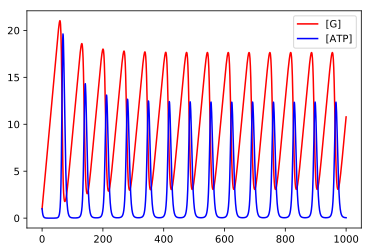

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, result[:,0], 'r', label="[G]")
plt.plot(t, result[:,1], 'b', label="[ATP]")
plt.legend()

No handles with labels found to put in legend.


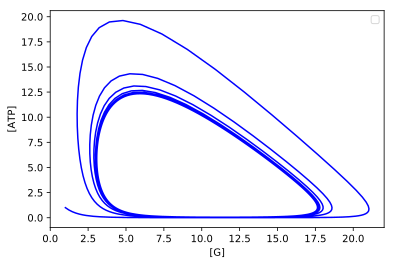

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(result[:,0], result[:,1], 'b')
plt.xlabel("[G]")
plt.ylabel("[ATP]")
plt.legend()

In [10]:
def atp_nullcline_fn(atp_vals):
    out = []
    for a in atp_vals:
        out.append(kp/(2*k1*(a+Km)))
    return out

def glucose_nullcline_fn(atp_vals):
    out = []
    for a in atp_vals:
        out.append(Vin/(k1*a))
    return out

atp_vals = np.linspace(1,20,1000)
atp_nullcline = atp_nullcline_fn(atp_vals)
glucose_nullcline = glucose_nullcline_fn(atp_vals)


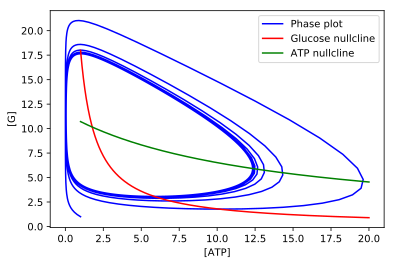

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(result[:,1], result[:,0], 'b', label="Phase plot")
plt.plot(atp_vals, glucose_nullcline, 'r', label="Glucose nullcline")
plt.plot(atp_vals, atp_nullcline, 'g', label="ATP nullcline")

plt.xlabel("[ATP]")
plt.ylabel("[G]")
plt.legend()